# INTRODUCTION


Customer segmentation is the act of grouping your audience into sub-categories based on similarities in user profiles. Segmentation allows you to find the best content, channel, and timing for your campaigns to be sent to potential leads or current customers. It empowers you to provide personalized experiences along each touch point across the user journey. As you create user profiles and segment your audience based on similarities within those profiles, you’ll get a better sense of each segment’s unique pain points. That way, you can create messages that resonate more deeply with that group to improve brand authority and increase conversions.



No two customers are exactly alike. And what your brand does can serve a wide variety of people - which is good for business, but a major marketing challenge. How do you market yourself to so many disparate consumers?

You could take a scattershot approach, throwing everything at the wall and hoping something sticks. Or you could create a laser-focused strategy - one that tailors your marketing efforts to the needs and interests of specific groups of customers. One that segments customers.

Customer segmentation uses different methods, or models, to divide your customers into smaller subgroups defined by shared characteristics. These common characteristics help you create customer profiles, and these in turn lead to increasingly personalized marketing messages that guide customers through their buyers journey.

Understanding your customers is key to the success of your business and customer segmentation is a crucial part of that understanding. Let’s take a closer look at customer segmentation models and how to choose the right ones for your brand.

In [158]:
 # Import Libraries
 
 import numpy as np
 import pandas as pd
 
 # Visualization
 import matplotlib.pyplot as plt
 import seaborn as sns
 import missingno as msno #for the exploratory visualization of missing data.
 import plotly.express as px
 import plotly.graph_objects as go
 from plotly.subplots import make_subplots
 import plotly.figure_factory as ff

In [159]:
# Preprocessing

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Clustering

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering

# Evaluation

from sklearn.metrics import confusion_matrix

# ignore warning

import warnings
warnings.filterwarnings('ignore')

# To display the total number of columns in the data set

pd.set_option('display.max_columns', None)

In [160]:
# Load the Data

data = pd.read_csv('/home/kali/Projects/Customer_segmentation/Data/Raw/marketing_campaign.csv', sep="\t")

In [161]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

<AxesSubplot: >

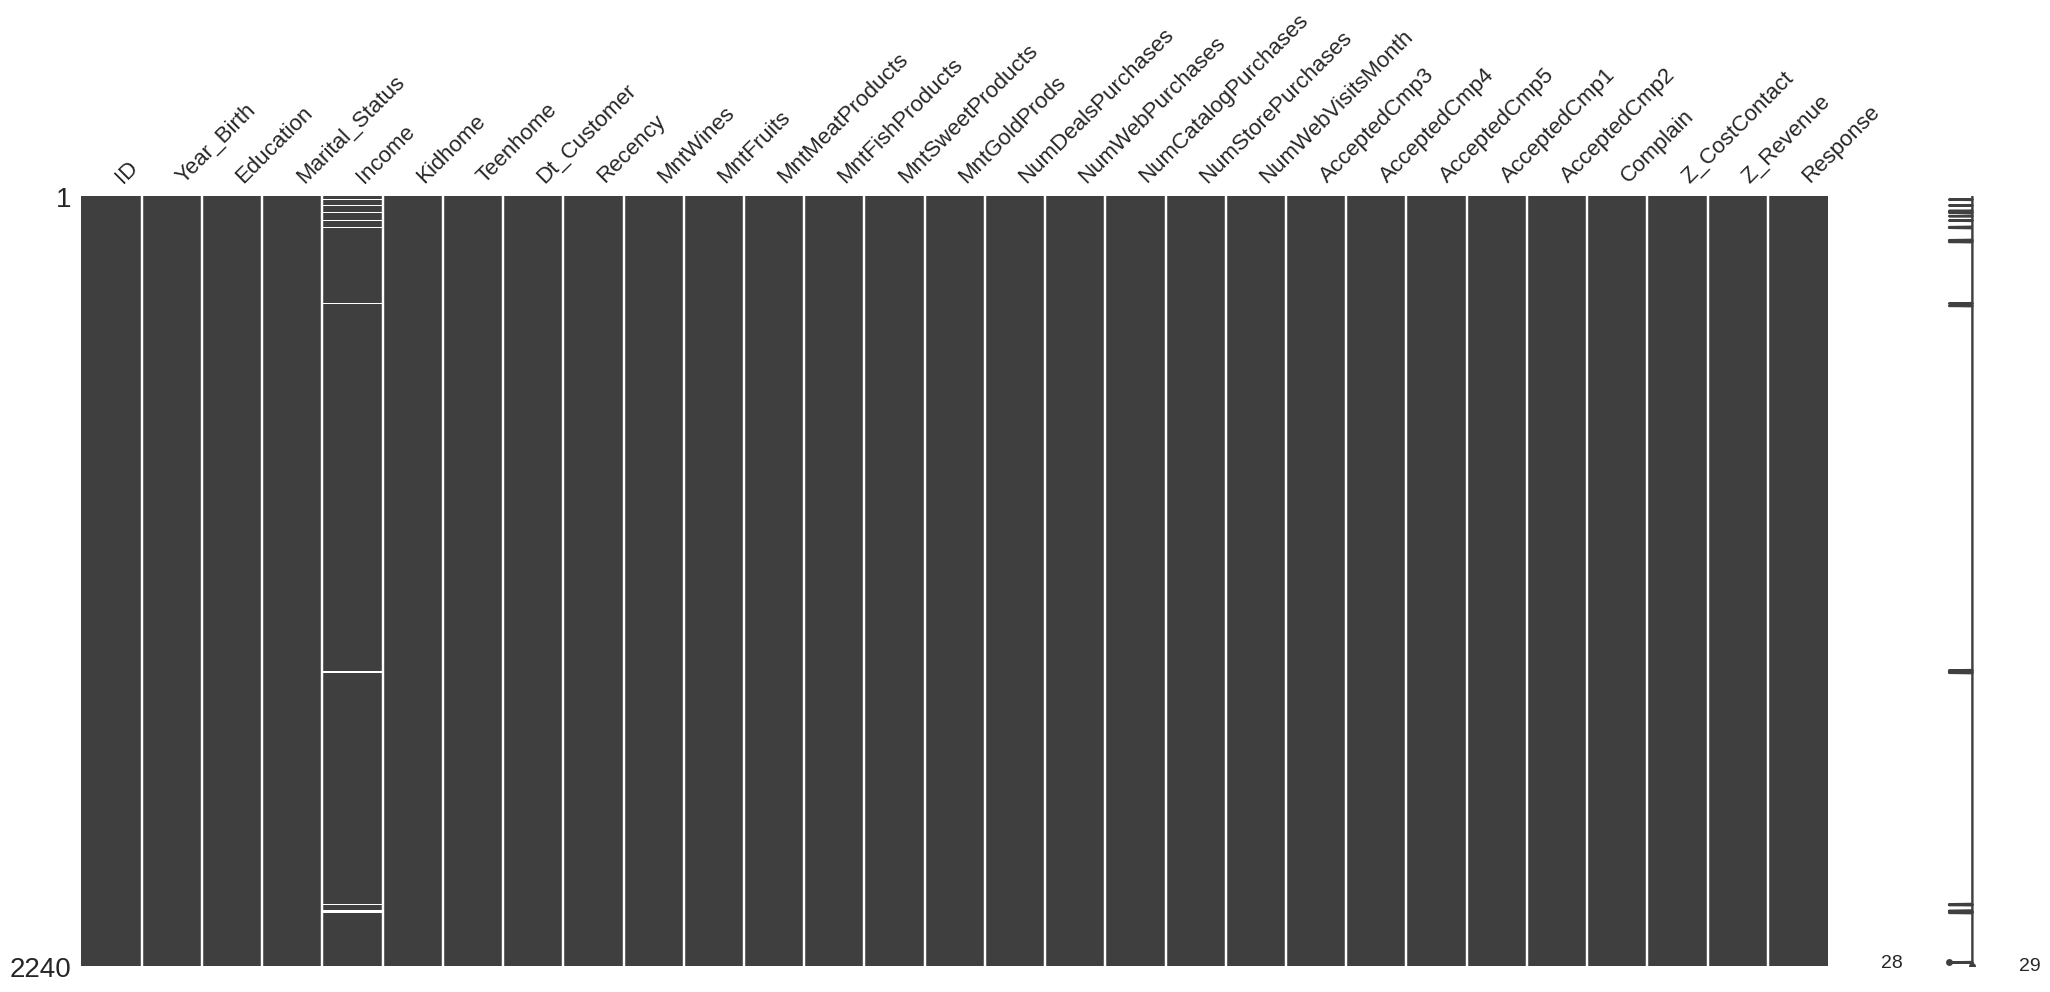

In [162]:
msno.matrix(data)

In [163]:
data = data.dropna()

In [164]:
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [165]:
data.duplicated().sum()

0

In [166]:
data.shape

(2216, 29)

In [167]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [168]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

### Column Details

#### People:

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise
#### Products:

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years
#### Promotion:

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
#### Place:

* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores


In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

Dt_customer column is not parsed as a Date Time

In [170]:
#  Parsing Dt_customer to Data Time

data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

In [171]:
print("The newest customer's enrolment date in the records:", max(data['Dt_Customer']))
print("The oldest customer's enrolment date in the records:", min(data['Dt_Customer']))

The newest customer's enrolment date in the records: 2014-12-06 00:00:00
The oldest customer's enrolment date in the records: 2012-01-08 00:00:00


In [172]:
# Checking the newest and oldest customer enrolment 

print("The newest customer's enrolment date in the records:", max(data['Dt_Customer']))
print("The oldest customer's enrolment date in the records:", min(data['Dt_Customer']))

The newest customer's enrolment date in the records: 2014-12-06 00:00:00
The oldest customer's enrolment date in the records: 2012-01-08 00:00:00


In [173]:
# Extract the age of a customer by the "Year_Berth" indicated by the birth year of the respective person

data['Age'] = 2015 - data['Year_Birth']

In [174]:
# Create a column spent  including the total amount spent by each customers in various catagories in two years 

data['Spent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']


In [175]:
# Create a column Living_with out of Material_Status to extract the living situation of couples

data['Living_With'] = data['Marital_Status'].replace({'Married':'Partner', 'Together':'Partner', 'Absurd':'Alone', 'Widow':'Alone', 'YOLO':'Alone', 'Divorced':'Alone', 'Single':'Alone'})
                                                    

In [176]:
# Create a column 'Children to include total children in household

data['Children'] = data['Kidhome'] + data['Teenhome']

In [177]:
# Create a Column 'Family_size' to include total members in a household

data['Family_Size'] = data['Living_With'].replace({'Alone': 1, 'Partner':2}) + data['Children']

In [178]:
# Create a column Is_parent to include parenthood status

data['Is_Parent'] = np.where(data.Children > 0, 1, 0)

In [179]:
# Segmenting education levels in groups

data['Education'] = data['Education'].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate', 'Graduation':'Graduate', 'Master':'Postgraduate', 'PhD':'Postgraduate'})

In [180]:
# Dropping some redundant columns
to_drop = ['Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID']
data = data.drop(to_drop, axis=1)

In [181]:
data.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,58,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,61,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,50,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,31,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,34,422,Partner,1,3,1


## Data Analysis and Visualization

In [182]:
data.shape

(2216, 29)

In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   MntWines             2216 non-null   int64  
 6   MntFruits            2216 non-null   int64  
 7   MntMeatProducts      2216 non-null   int64  
 8   MntFishProducts      2216 non-null   int64  
 9   MntSweetProducts     2216 non-null   int64  
 10  MntGoldProds         2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   i

In [184]:
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,46.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,122.000000,2525.000000,3.000000,5.000000,1.000000


In [185]:
data.describe(include=object).T

,count,unique,top,freq
Education,2216,3,Graduate,1116
Living_With,2216,2,Partner,1430


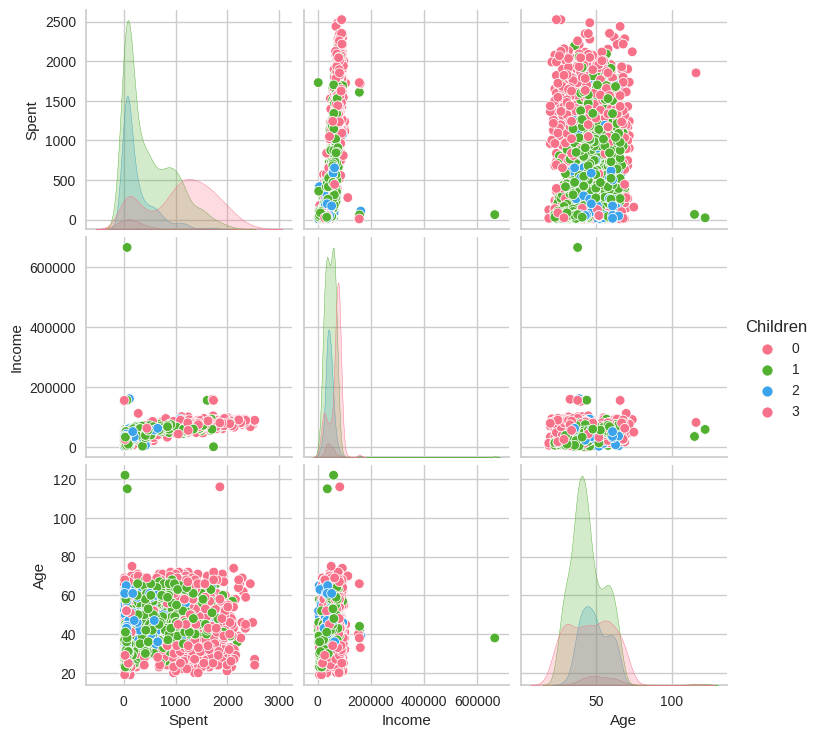

In [186]:
sns.pairplot(data, vars= ['Spent', 'Income', 'Age'], hue= 'Children', palette= 'husl')

<AxesSubplot: xlabel='Spent', ylabel='Income'>

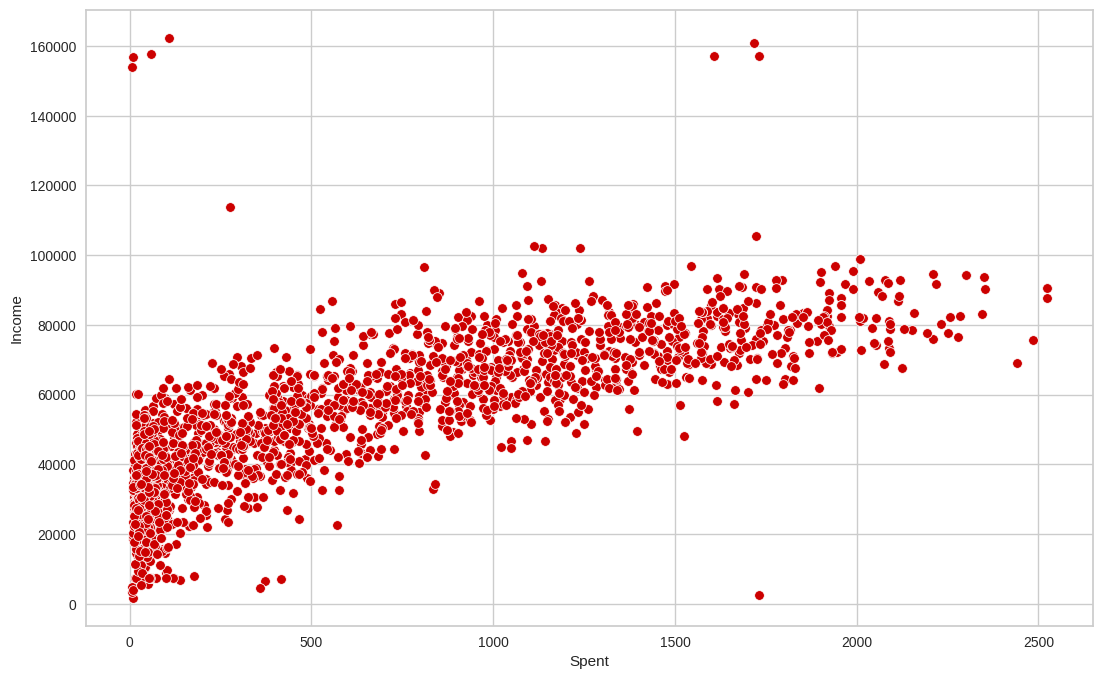

In [187]:
plt.figure(figsize=(13, 8))
sns.scatterplot(x = data[data['Income']<600000]['Spent'], y = data[data['Income']<600000]['Income'], color='#cc0000')

<AxesSubplot: xlabel='Spent', ylabel='Age'>

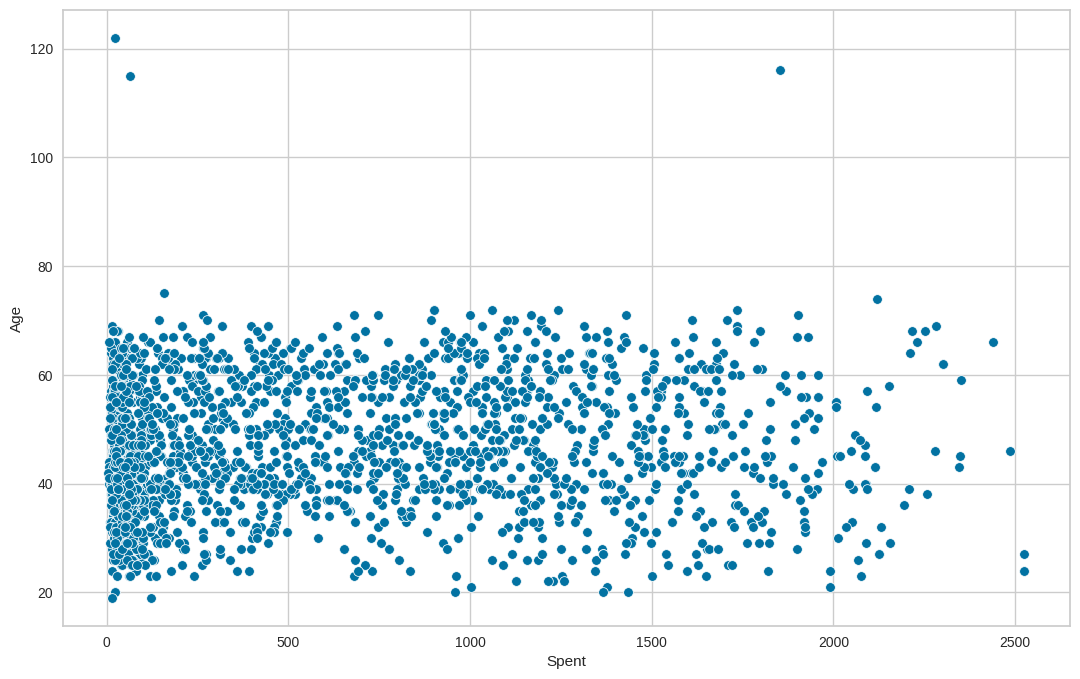

In [188]:
plt.figure(figsize=(13,8))
sns.scatterplot(x = data['Spent'], y = data['Age'])

plt.figure(figsize= (13,8))
sns.histplot(x = data['Spent'],hue = data['Education'])

<AxesSubplot: ylabel='Education'>

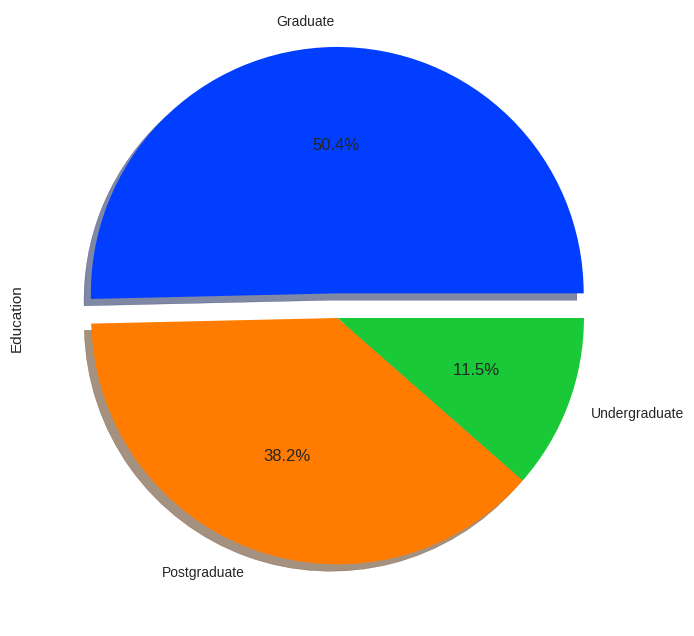

In [189]:
data['Education'].value_counts().plot.pie(explode=[0.1,0,0], autopct='%1.1f%%', shadow=True, figsize=(8,8), colors=sns.color_palette('bright'))

## Outlier Detection

The presence of outliers in a classifaction or regression can result in poor fit or lower predictive model performances . therfor we should look for outliers in data

<AxesSubplot: xlabel='Age', ylabel='Density'>

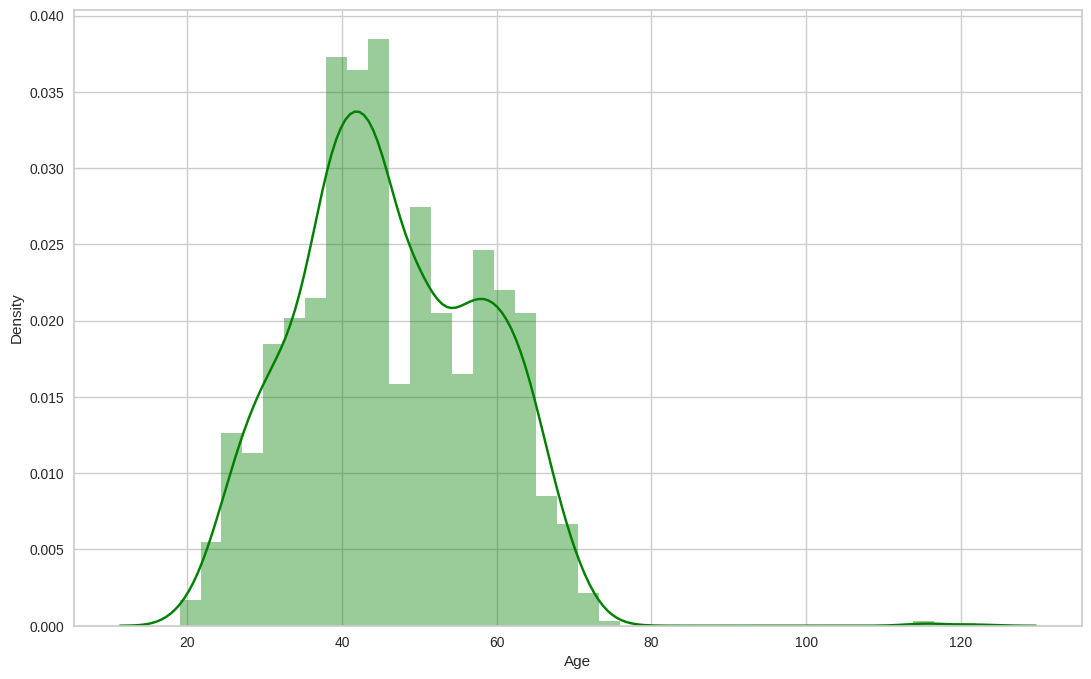

In [190]:
plt.figure(figsize=(13,8))
sns.distplot(data.Age, color='green')

<AxesSubplot: xlabel='Income', ylabel='Density'>

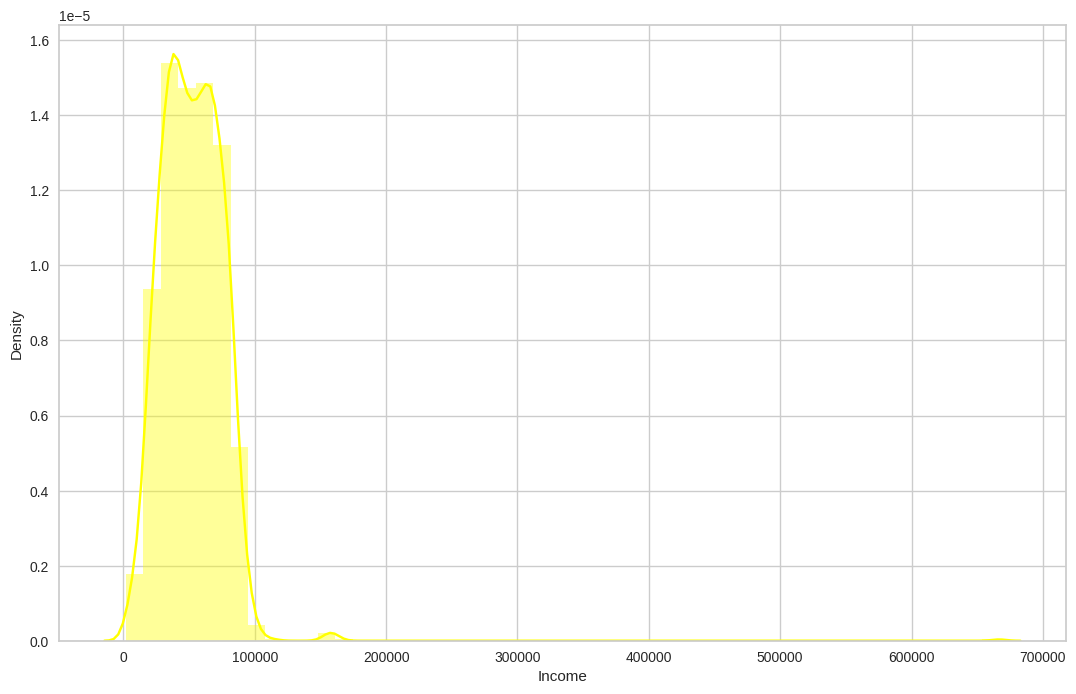

In [191]:
plt.figure(figsize=(13,8))
sns.distplot(data.Income, color ='Yellow')

<AxesSubplot: xlabel='Spent', ylabel='Density'>

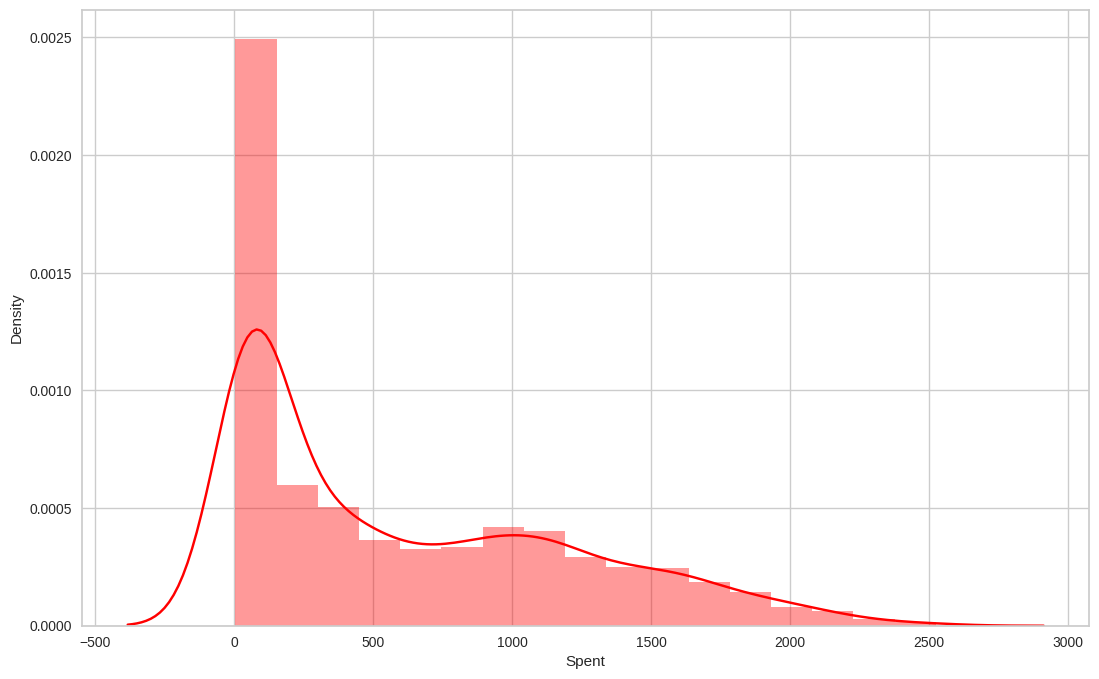

In [192]:
plt.figure(figsize=(13,8))
sns.distplot(data.Spent, color='Red')

#### Another way of visualising outliers is using boxplots and whiskers
* All the dots in the plot below are outliers according to the quantiles + 1.5 IQR rule

In [193]:
fig = make_subplots(rows=1, cols=3)

fig.add_trace(go.Box(y=data['Age'], notched=True, name='Age', marker_color = '#6699ff', 
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 2)

fig.add_trace(go.Box(y=data['Income'], notched=True, name='Income', marker_color = '#ff0066', 
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 1)

fig.add_trace(go.Box(y=data['Spent'], notched=True, name='Spent', marker_color = 'lightseagreen', 
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 3)

fig.update_layout(title_text='Box Plots for Numerical Variables')

fig.show()

In [194]:
data.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,58,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,61,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,50,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,31,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,34,422,Partner,1,3,1


In [195]:
numerical = ['Income', 'Recency', 'Age', 'Spent']

In [196]:
def detect_outliers(d):
  for i in d:
    Q3, Q1 = np.percentile(data[i], [75 ,25])
    IQR = Q3 - Q1

    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR

    outliers = data[i][(data[i] > ul) | (data[i] < ll)]
    print(f'*** {i} outlier points***', '\n', outliers, '\n')  

In [197]:
detect_outliers(numerical)

*** Income outlier points*** 
 164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64 

*** Recency outlier points*** 
 Series([], Name: Recency, dtype: int64) 

*** Age outlier points*** 
 192    115
239    122
339    116
Name: Age, dtype: int64 

*** Spent outlier points*** 
 1179    2525
1492    2524
1572    2525
Name: Spent, dtype: int64 



In [198]:
# Deleting some of the outlier points

data = data[(data['Age']<100)]
data = data[(data['Income']<600000)]

In [199]:
data.shape

(2212, 29)

#### Checking for Rare Categories

some categories may appear a lot in the data set , where as some other categories may appear only in a few number of observation

In [200]:
categorical = [var for var in data.columns if data[var].dtype=='O']

In [201]:
# Checking the number of different lables

for var in categorical:
    print(data[var].value_counts() / np.float(len(data)))
    print()
    print()

Graduate         0.504069
Postgraduate     0.382007
Undergraduate    0.113924
Name: Education, dtype: float64


Partner    0.64557
Alone      0.35443
Name: Living_With, dtype: float64




There is no rare category in the categorical veriables.

#### Categorical Variables Encoding

Encoding categorical data is a process of converting categorical data into integer format so that the data with converted categorical values can be provided to the different models.

In [202]:
categorical

['Education', 'Living_With']

In [203]:
data['Living_With'].unique()

array(['Alone', 'Partner'], dtype=object)

Since Education is ordinal variable we will encode it with ordinal numbers

In [204]:
data['Education'].unique()

array(['Graduate', 'Postgraduate', 'Undergraduate'], dtype=object)

In [205]:
data['Education'] = data['Education'].map({'Undergraduate':0,'Graduate':1, 'Postgraduate':2})

In [206]:
data['Living_With'] = data['Living_With'].map({'Alone':0,'Partner':1})

In [207]:
data.dtypes

Education                int64
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
Age                      int64
Spent                    int64
Living_With              int64
Children                 int64
Family_Size              int64
Is_Parent                int64
dtype: object

In [208]:
data.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,1,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,58,1617,0,0,1,0
1,1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,61,27,0,2,3,1
2,1,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,50,776,1,0,2,0
3,1,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,31,53,1,1,3,1
4,2,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,34,422,1,1,3,1


<AxesSubplot: >

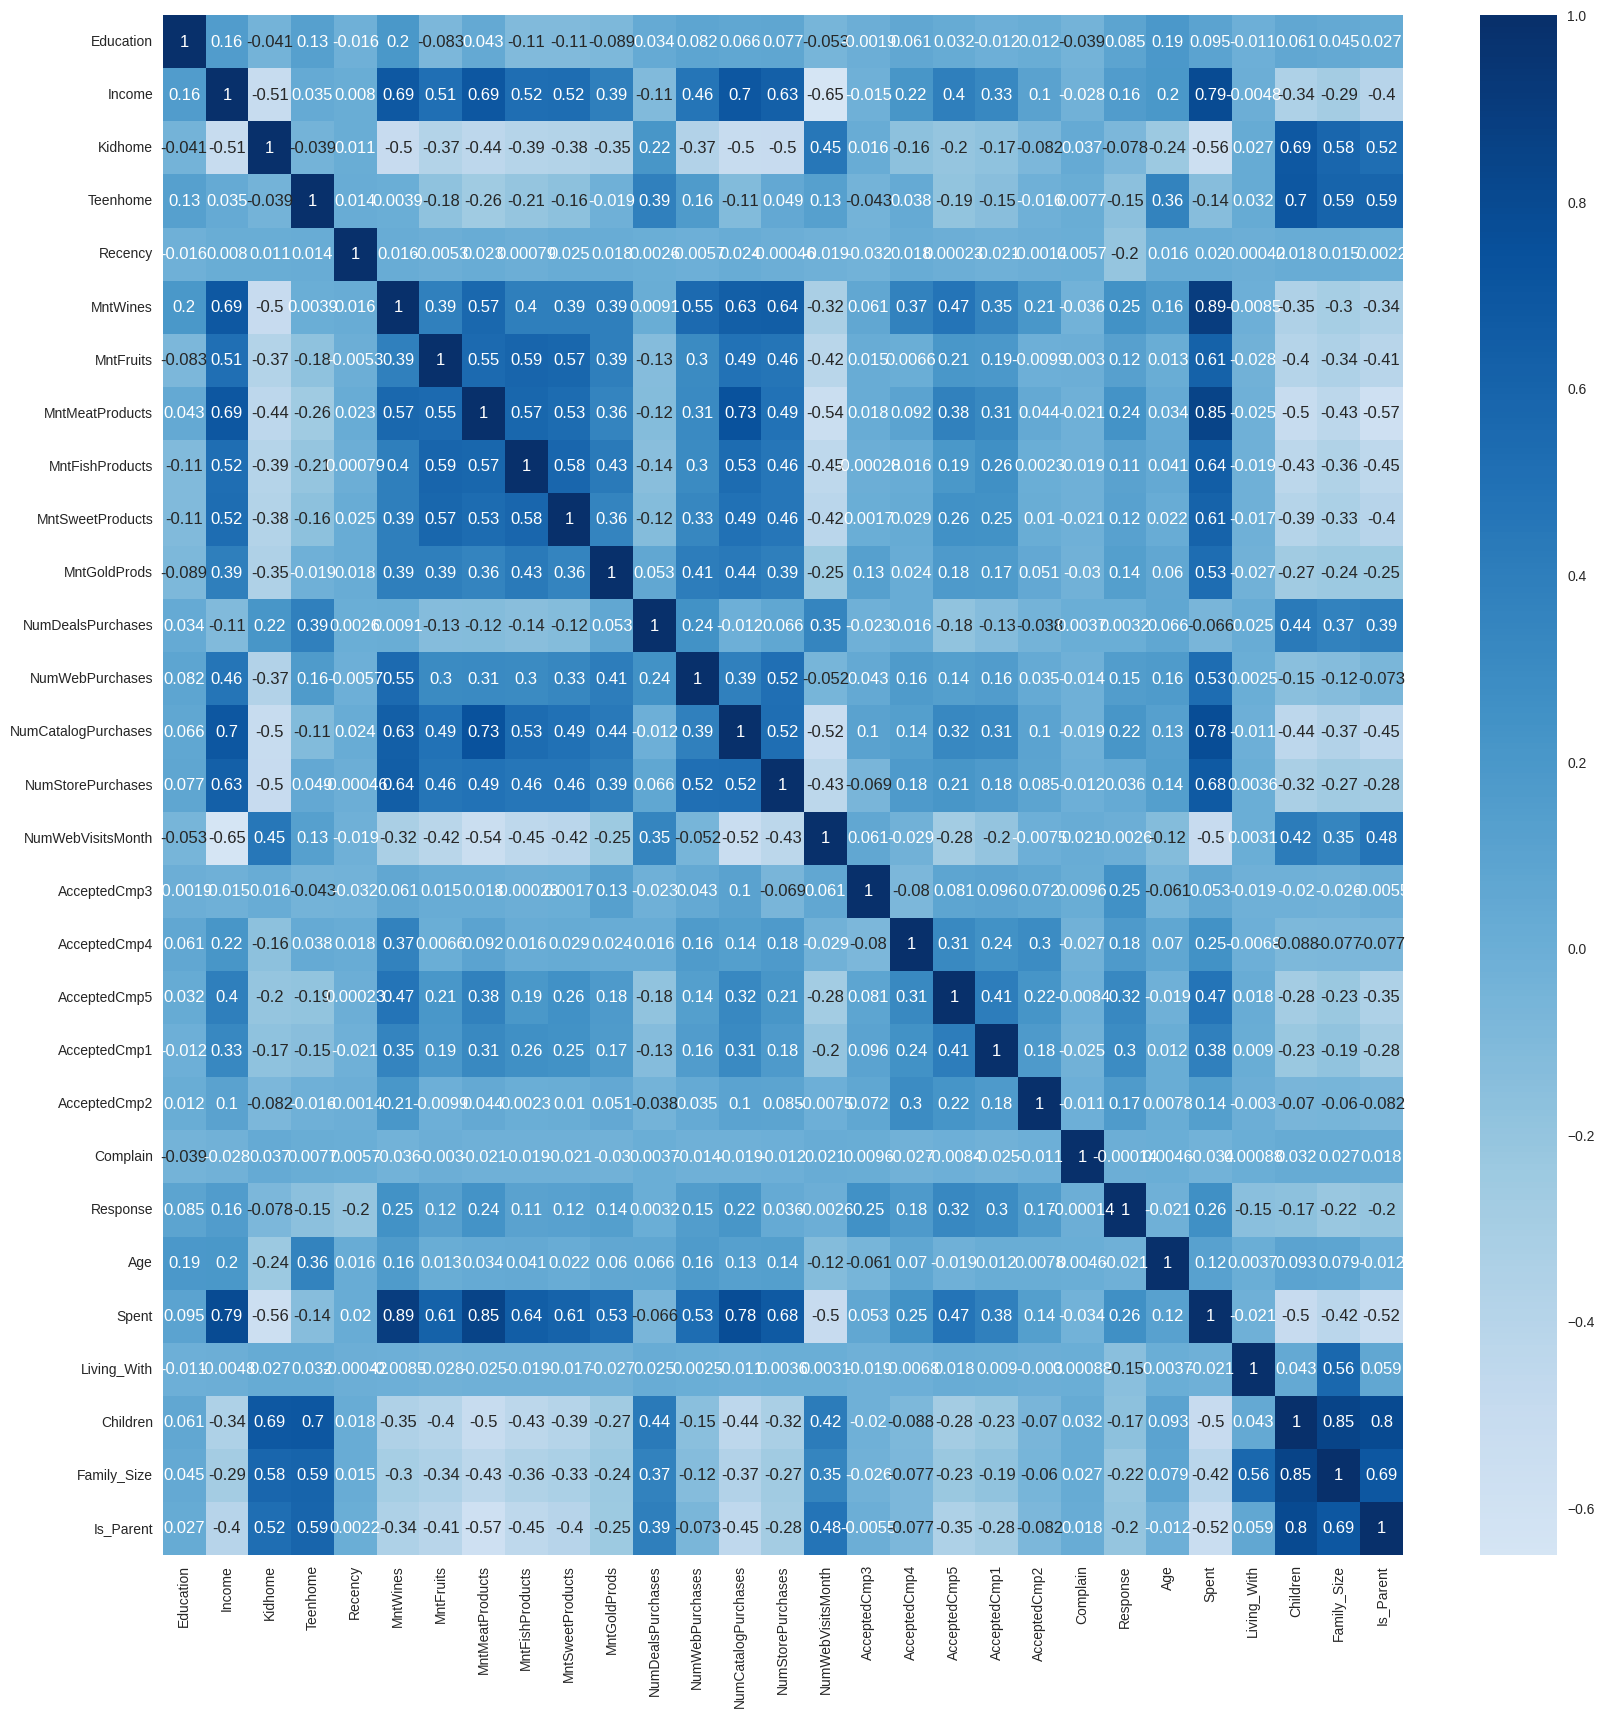

In [209]:
corrmat = data.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corrmat, annot=True, cmap= 'Blues', center=0)

#### Feature Scaling

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization 

In this section numerical features are scaled

standardscalar = z = (x - u) / s

In [210]:
data_old = data.copy()

In [211]:
# Create a subset of dataframes by droping the teatures on  'deals accepted and promotions

cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
data = data.drop(cols_del, axis=1)

In [212]:
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns= data.columns)

In [213]:
data.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.411675,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.411675,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.411675,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.411675,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,1.123949,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,0.332600,0.111982,0.059532,-0.132545,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


#### Dimensionality Reduction
Dimensionality reduction, or dimension reduction, is the transformation of data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains some meaningful properties of the original data.

Principal Component Analysis (PCA) is an unsupervised learning algorithm that is used for the dimensionality reduction in machine learning.

In [214]:
p = PCA(n_components = 3)
p.fit(data)

PCA(n_components=3)

In [215]:
W = p.components_.T
W

array([[ 1.13473375e-02,  1.40723757e-01, -5.06628421e-01],
       [ 2.79487029e-01,  1.78237421e-01, -7.51852251e-02],
       [-2.46222910e-01,  5.22764779e-03,  2.82547297e-01],
       [-9.87086833e-02,  4.62104025e-01, -1.51414490e-01],
       [ 3.52658770e-03,  1.62571780e-02,  3.59843762e-02],
       [ 2.55717053e-01,  2.09383416e-01, -1.17252729e-01],
       [ 2.38398095e-01,  1.10548258e-02,  2.55089754e-01],
       [ 2.85462109e-01,  9.91397133e-03,  7.66407539e-02],
       [ 2.48709764e-01,  2.43964867e-04,  2.52797482e-01],
       [ 2.37301758e-01,  2.16399580e-02,  2.58060812e-01],
       [ 1.88380278e-01,  1.23087428e-01,  1.99256091e-01],
       [-7.82600223e-02,  3.48733298e-01,  1.52755383e-01],
       [ 1.67559707e-01,  2.96788034e-01,  2.32472038e-02],
       [ 2.77349221e-01,  1.05966704e-01,  1.72053251e-02],
       [ 2.41542755e-01,  2.05467731e-01, -8.17953843e-03],
       [-2.25949364e-01,  4.60990197e-02,  9.08745983e-02],
       [ 3.84646277e-02,  2.34782905e-01

In [216]:
pd.DataFrame(W, index = data.columns, columns=['W1','W2','W3'])

,W1,W2,W3
Education,0.011347,0.140724,-0.506628
Income,0.279487,0.178237,-0.075185
Kidhome,-0.246223,0.005228,0.282547
Teenhome,-0.098709,0.462104,-0.151414
Recency,0.003527,0.016257,0.035984
MntWines,0.255717,0.209383,-0.117253
MntFruits,0.238398,0.011055,0.255090
MntMeatProducts,0.285462,0.009914,0.076641
MntFishProducts,0.248710,0.000244,0.252797
MntSweetProducts,0.237302,0.021640,0.258061


In [217]:
p.explained_variance_

array([8.27465625, 2.9209145 , 1.43059387])

In [218]:
p.explained_variance_ratio_

array([0.3759507 , 0.13270882, 0.0649976 ])

In [219]:
pd.DataFrame(p.explained_variance_ratio_, index = range(1,4), columns=['Explained Variability'])

,Explained Variability
1,0.375951
2,0.132709
3,0.064998


In [220]:
p.explained_variance_ratio_.cumsum()

array([0.3759507 , 0.50865952, 0.57365712])

Text(0, 0.5, 'Lambda i')

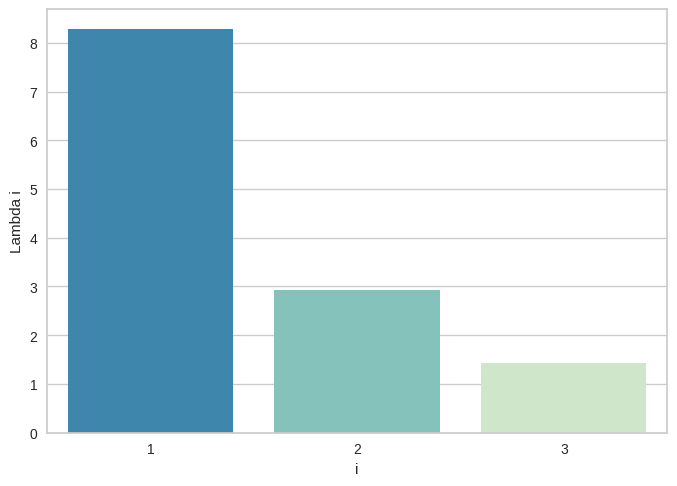

In [221]:
sns.barplot(x = list(range(1,4)), y = p.explained_variance_, palette = 'GnBu_r')
plt.xlabel('i')
plt.ylabel('Lambda i')

In [222]:
data_PCA = pd.DataFrame(p.transform(data), columns=(['col1', 'col2', 'col3']))

In [223]:
data_PCA.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,7.709324e-17,2.876570,-5.915029,-2.548037,-0.784932,2.418555,7.441146
col2,2212.0,-2.569775e-17,1.709068,-4.398457,-1.343425,-0.133321,1.243059,6.248183
col3,2212.0,-3.051608e-17,1.196078,-3.542484,-0.864998,-0.015138,0.823454,5.032362


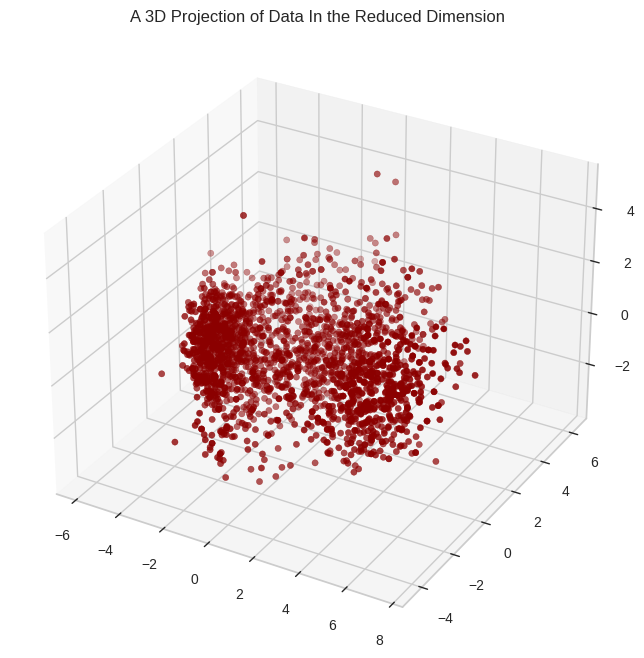

In [224]:
x = data_PCA['col1']
y = data_PCA['col2']
z = data_PCA['col3']

fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x,y,z, c = 'darkred', marker = 'o')
ax.set_title('A 3D Projection of Data In the Reduced Dimension')
plt.show()

#### Clustering

Elbow Method to determine the number of clusters to formed.

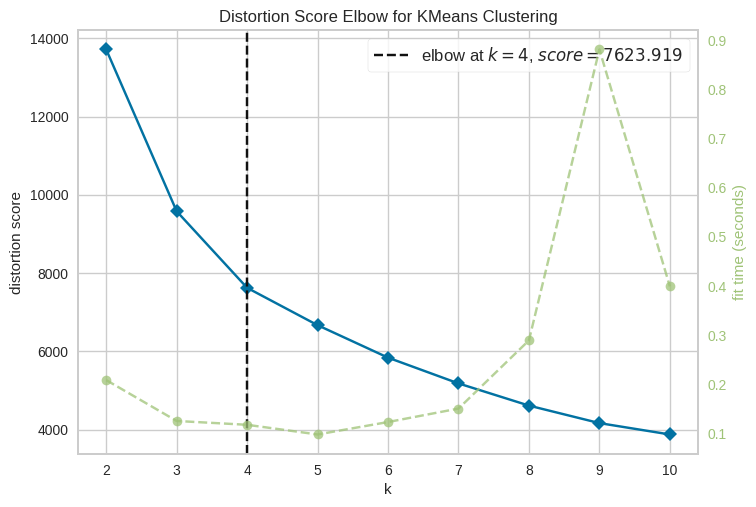

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [225]:
Elbow_M = KElbowVisualizer(KMeans(), k = 10)
Elbow_M.fit(data_PCA)
Elbow_M.show()

In [226]:
AC = AgglomerativeClustering(n_clusters= 4)

# Fit model and predict cluster
yhat_AC = AC .fit_predict(data_PCA)
data_PCA['Clusters'] = yhat_AC

# Adding the clusters feature to the orignal dataframe

data['Clusters'] = yhat_AC
data_old['Clusters'] = yhat_AC

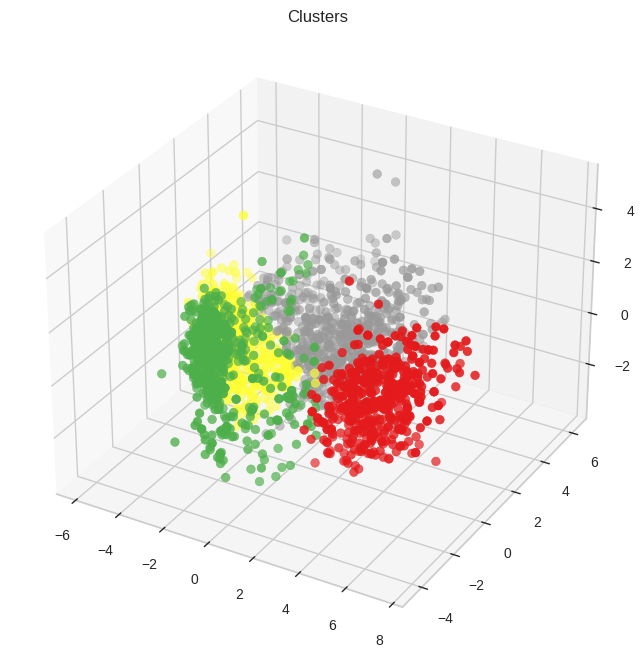

In [227]:
fig = plt.figure(figsize= (13,8))
ax = plt.subplot(111, projection = '3d', label = 'bla')
ax.scatter(x,y,z, s=40, c=data_PCA['Clusters'], marker= 'o', cmap = 'Set1_r')
ax.set_title('Clusters')
plt.show()

#### Clusters Analysis and Customers Profiling

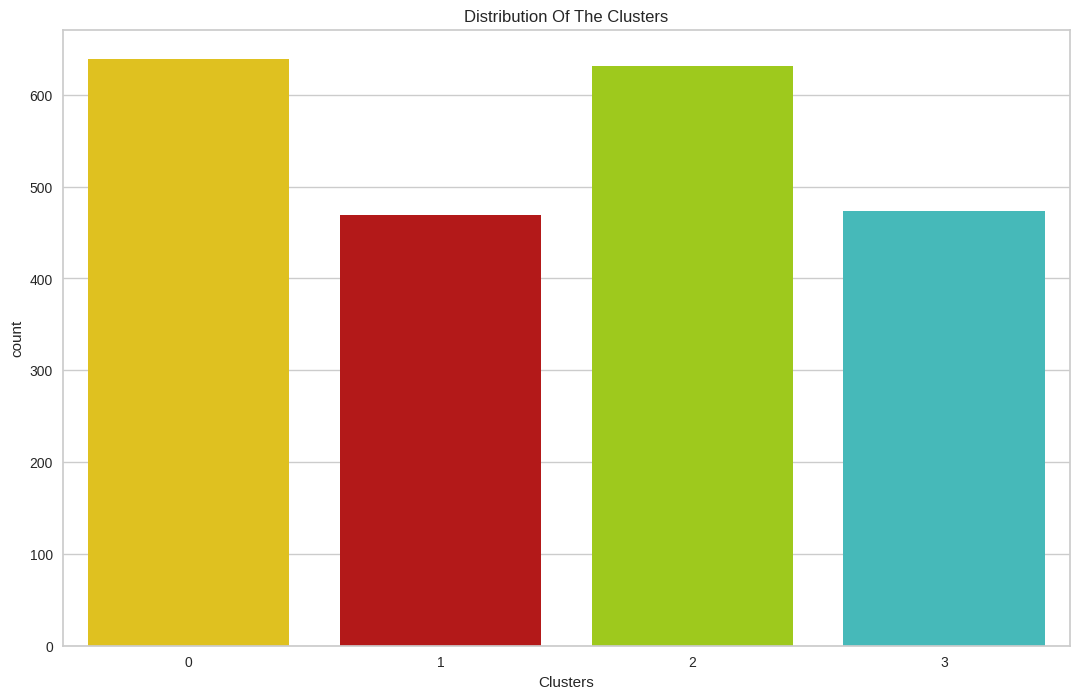

In [228]:
pal = ['gold','#cc0000', '#ace600','#33cccc']
plt.figure(figsize=(13,8))
pl = sns.countplot(x = data['Clusters'], palette = pal)
pl.set_title('Distribution Of The Clusters')
plt.show()

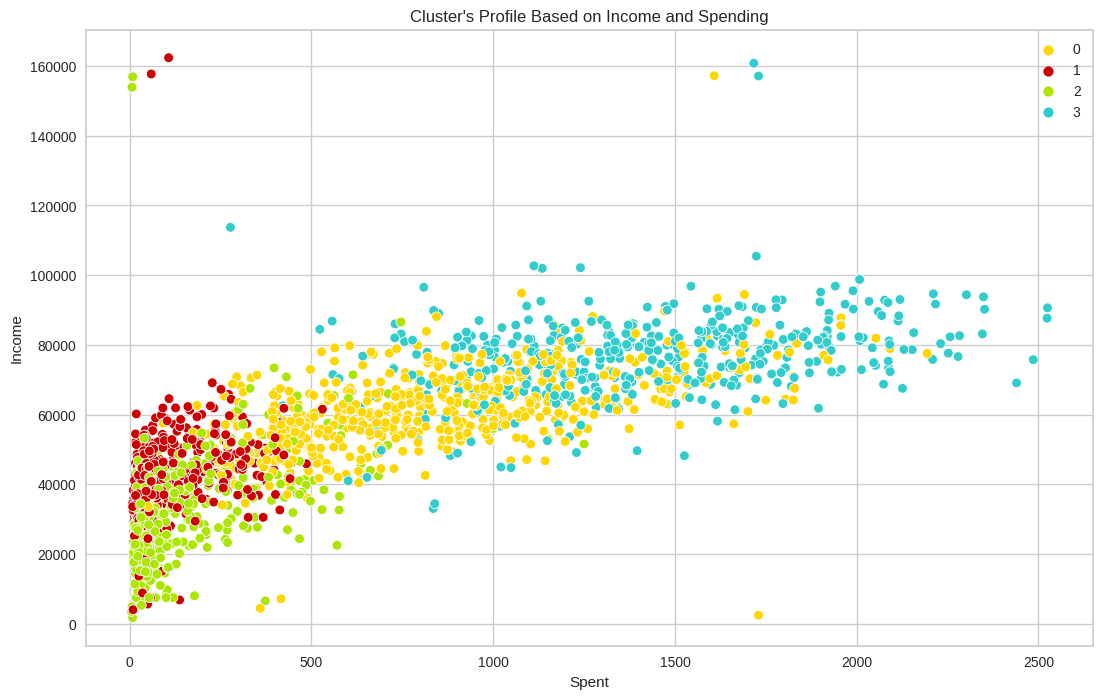

In [229]:
plt.figure(figsize=(13,8))
pl = sns.scatterplot(data=data_old, x=data_old['Spent'], y=data_old['Income'], hue=data_old['Clusters'], palette= pal)
pl.set_title("Cluster's Profile Based on Income and Spending")
plt.legend();

#### Findings:

Income Vs Spending plot showed the Cluster pattern
* Group 0 : Average Spending and Average Income
* Group 1 : Low Spending and Average Income
* Group 2 : Low Spending and Low Income
* Group 3 : High Spending and High Income

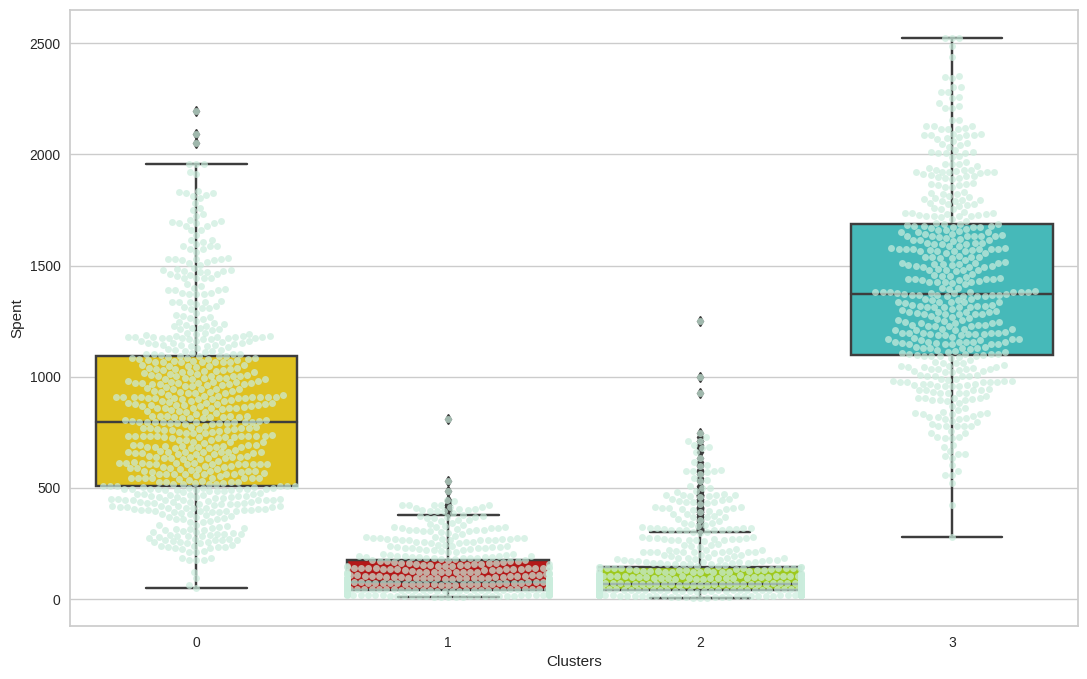

In [230]:
plt.figure(figsize = (13,8))
pl = sns.swarmplot(x = data_old['Clusters'], y= data_old['Spent'], color = '#CBEDDD', alpha = 0.7)
pl = sns.boxplot(x = data_old['Clusters'],y= data_old['Spent'], palette = pal)
plt.show()

From the above plot, it can be clearly seen that cluster 3 is our biggest set of customers  followed by cluster 0. We can explore what each cluster is spending on for the targeted marketing strategies.

#### Count of Total Campaign accepted

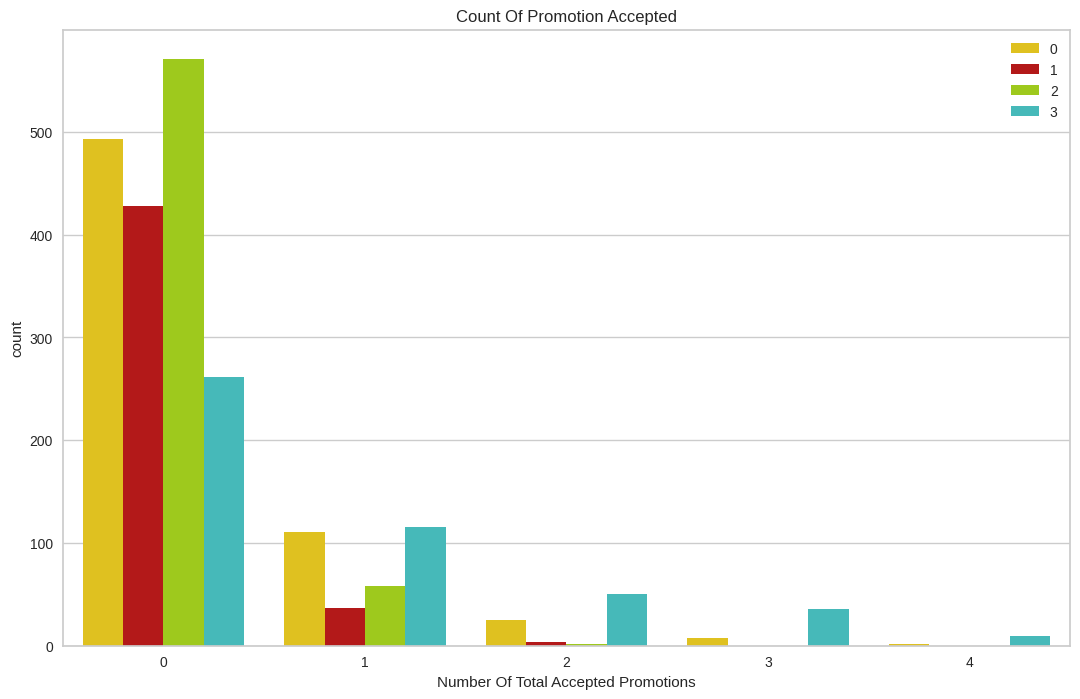

In [231]:
data_old['Total_Promos'] = data_old['AcceptedCmp1']+ data_old['AcceptedCmp2']+ data_old['AcceptedCmp3']+ data_old['AcceptedCmp4']+ data_old['AcceptedCmp5']

plt.figure(figsize=(13,8))
pl = sns.countplot(x=data_old['Total_Promos'], hue=data_old['Clusters'], palette= pal)
pl.set_title('Count Of Promotion Accepted')
pl.set_xlabel('Number Of Total Accepted Promotions')
plt.legend(loc='upper right')
plt.show();

There has not been an overwhelming response to the campaigns so far. Very few participants overall. Moreover, no one part take in all 5 of them. Perhaps better-targeted and well-planned campaigns are required to boost sales.

#### Plotting the number of deals purchased

Text(0.5, 1.0, 'Number of Deals Purchased')

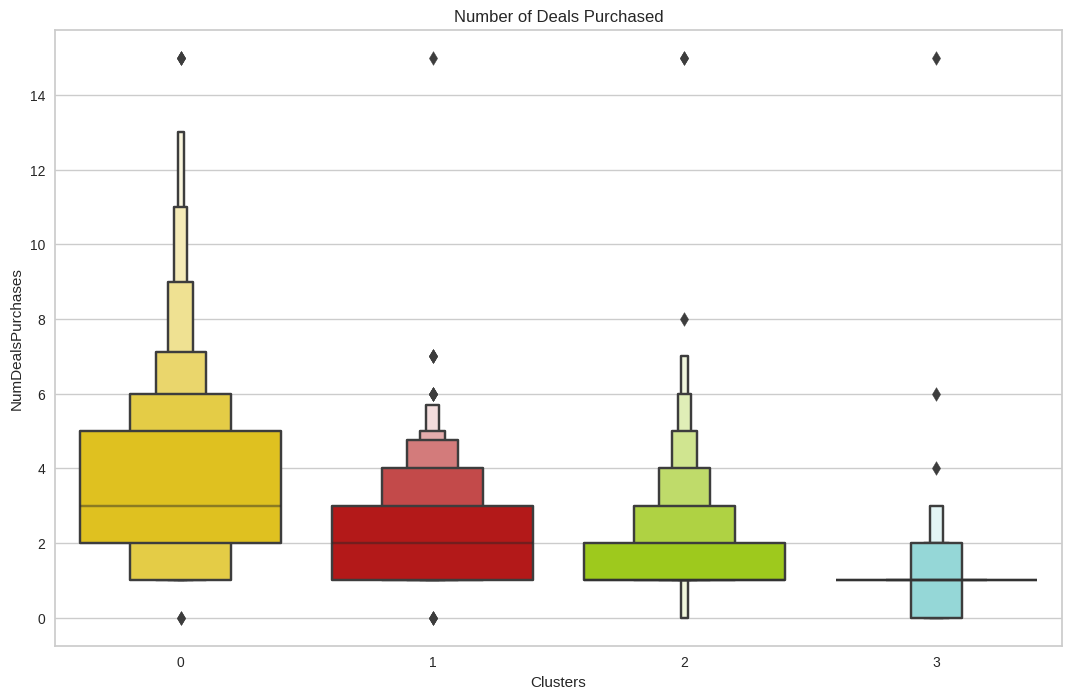

In [232]:
plt.figure(figsize=(13,8))
pl=sns.boxenplot(y=data_old['NumDealsPurchases'],x=data_old['Clusters'], palette= pal)
pl.set_title('Number of Deals Purchased')

Unlike campaigns, the deals offered did well. It has best outcome with cluster 0 and cluster 2. However, our star customers cluster 3 are not much into the deals. Nothing seems to attract cluster 2 overwhelmingly

<Figure size 1300x800 with 0 Axes>

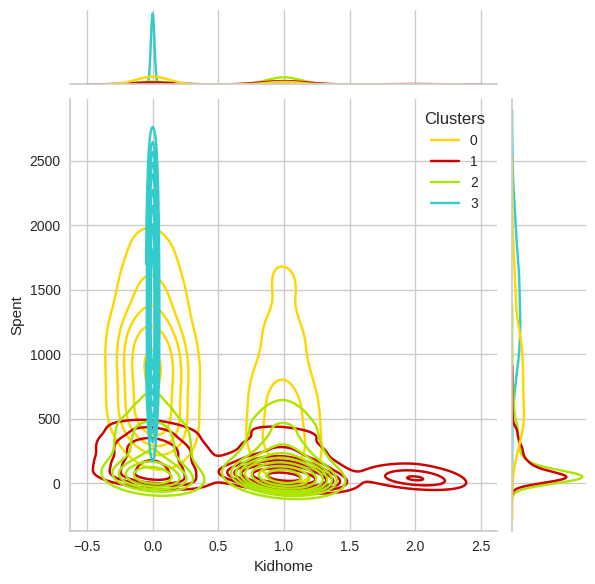

<Figure size 1300x800 with 0 Axes>

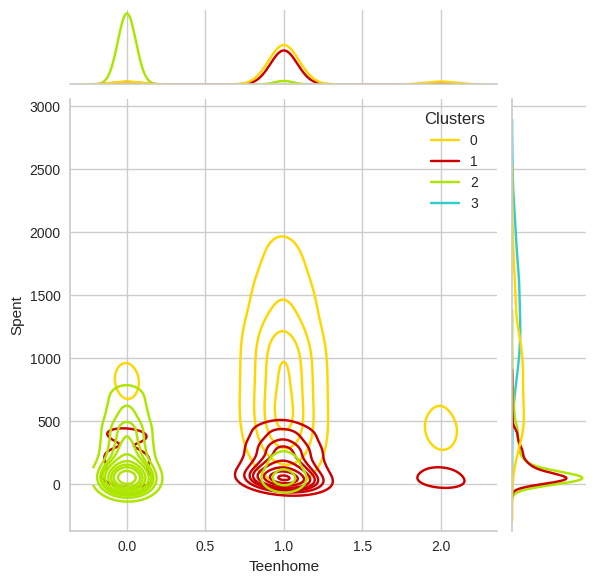

<Figure size 1300x800 with 0 Axes>

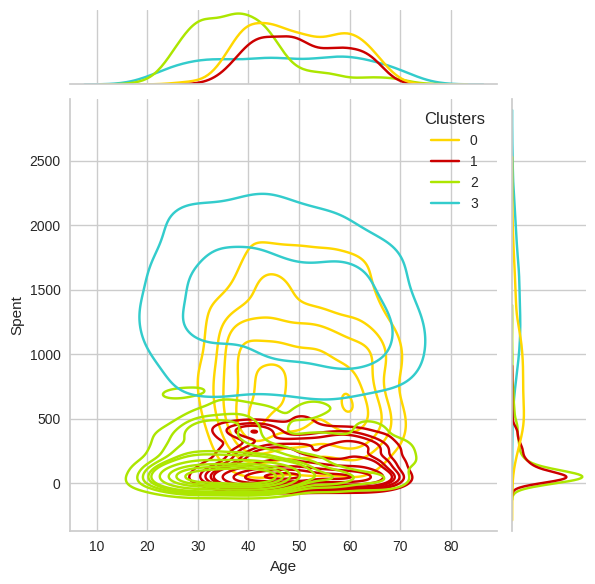

<Figure size 1300x800 with 0 Axes>

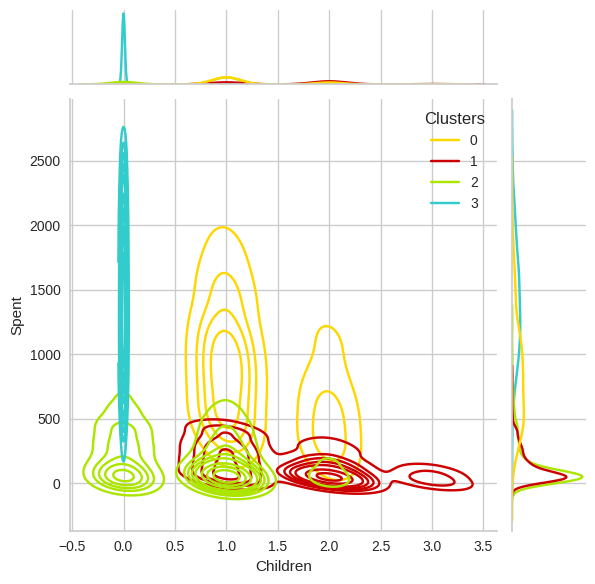

<Figure size 1300x800 with 0 Axes>

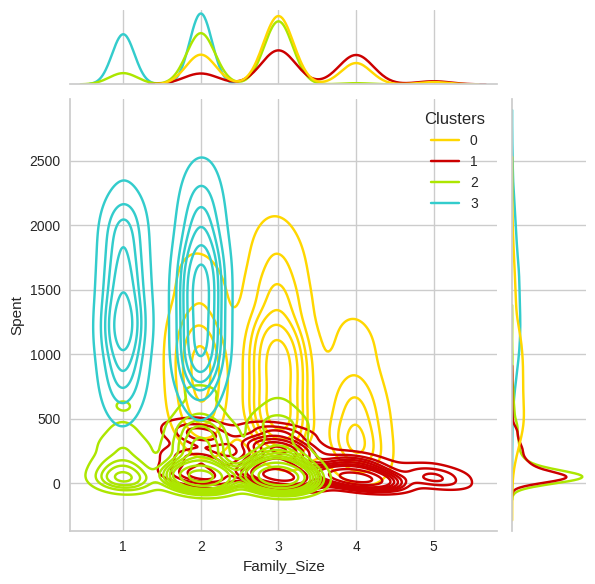

<Figure size 1300x800 with 0 Axes>

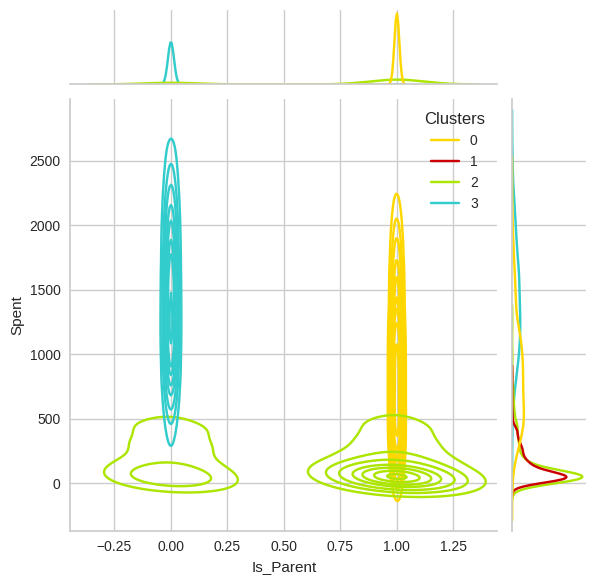

<Figure size 1300x800 with 0 Axes>

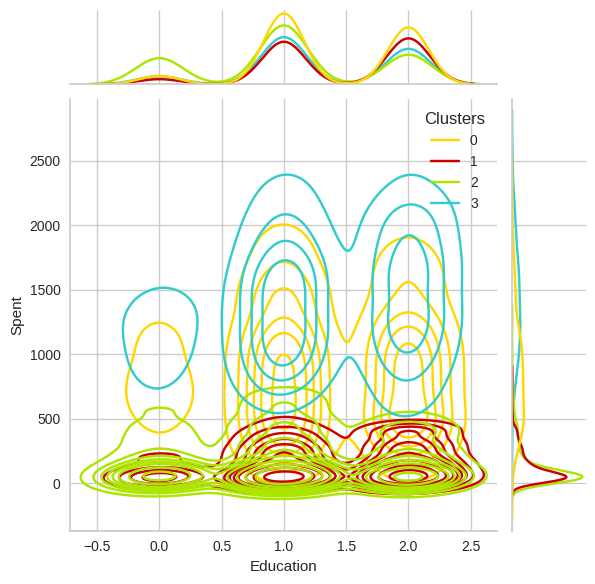

<Figure size 1300x800 with 0 Axes>

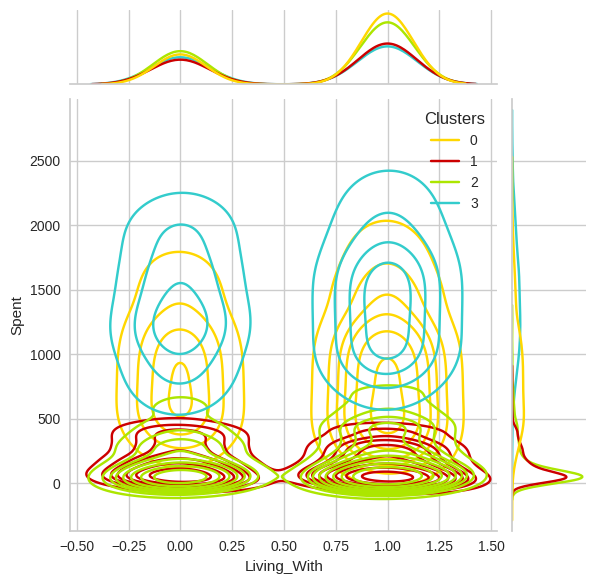

In [233]:
Personal = ['Kidhome', 'Teenhome', 'Age', 'Children', 'Family_Size', 'Is_Parent', 'Education', 'Living_With']

for i in Personal:
    plt.figure(figsize=(13,8))
    sns.jointplot(x=data_old[i], y=data_old['Spent'], hue=data_old['Clusters'], kind='kde', palette=pal)

##### About Cluster 0:
* Definitely a parent
* At max have 4 members in the family and at least 2
* Most have a teeanger in home
* Single parents are a subset of this group
* Relatively older

##### About Cluster 1:

* Definitely a parent
* At max have 5 members in the family and at least 2
* Majority of them have a teenager at home
* Relatively older

#### About Cluster 2:

* The majority of these people are parents
* At max have 3 members in the family
* They majorly have one kid and typically not tennagers
* Relatively younger


#### About Cluster 3:

* Definitely not a parent
* At max are only 2 members in the family.
* A slight majority of couples over single people
* Span all ages
* high income and high spending